In [1]:
import sys
import os

project_root = r"C:\Users\aimje\OneDrive\Documents\Other projects\early_detection_lms"
sys.path.insert(0, project_root)

from src.data.data_generator import LMSDataGenerator

print("✓ Working!")

✓ Working!


# 01 - Data Exploration and Generation

This notebook explores the synthetic LMS log data and understands student behavior patterns.

## Objectives:
1. Generate synthetic LMS log data
2. Explore data distributions
3. Analyze at-risk vs normal student patterns
4. Save data for feature engineering

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

from src.utils.config import *

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ All imports successful")

✓ All imports successful


## Step 1: Generate Synthetic LMS Data

We'll generate data for 1000 students over 90 days to simulate a full semester.

In [3]:
# Initialize data generator
generator = LMSDataGenerator(n_students=1000, random_seed=42)

# Generate LMS log data
print("Generating LMS log data...")
print("-" * 60)
raw_data = generator.generate_student_data(n_days=90)

print("\n" + "=" * 60)
print("DATA GENERATION COMPLETE")
print("=" * 60)
print(f"Total log entries: {len(raw_data):,}")
print(f"Unique students: {raw_data['student_id'].nunique()}")
print(f"Date range: {raw_data['date'].min()} to {raw_data['date'].max()}")

Generating LMS log data...
------------------------------------------------------------
Generating data for 1000 students over 90 days...
  Processed 100/1000 students...
  Processed 200/1000 students...
  Processed 300/1000 students...
  Processed 400/1000 students...
  Processed 500/1000 students...
  Processed 600/1000 students...
  Processed 700/1000 students...
  Processed 800/1000 students...
  Processed 900/1000 students...
  Processed 1000/1000 students...
Generated 69121 log entries
At-risk students: 237 (23.7%)

DATA GENERATION COMPLETE
Total log entries: 69,121
Unique students: 1000
Date range: 2025-10-30 to 2026-01-27


## Step 2: Explore the Data Structure

In [4]:
# Display first few rows
print("Sample of raw data:")
print(raw_data.head(10))

print("\n" + "="*60)
print("Data Info:")
print("="*60)
print(raw_data.info())

print("\n" + "="*60)
print("Statistical Summary:")
print("="*60)
print(raw_data.describe())

Sample of raw data:
  student_id        date  login_count  session_duration  page_views  \
0   STU_0001  2025-10-30            1        135.455464          29   
1   STU_0001  2025-10-31            3         25.449168          22   
2   STU_0001  2025-11-01            3        133.815951          22   
3   STU_0001  2025-11-02            2         17.708944          23   
4   STU_0001  2025-11-03            3         19.975170          18   
5   STU_0001  2025-11-04            1          5.137535          22   
6   STU_0001  2025-11-07            3         17.567271          25   
7   STU_0001  2025-11-08            2         30.252245          28   
8   STU_0001  2025-11-09            2         40.220028          28   
9   STU_0001  2025-11-11            1         98.150966          29   

   forum_posts  assignments_submitted  quiz_attempts  quiz_score  \
0            1                      1              2   81.348496   
1            1                      1              1   90.1261

## Step 3: Analyze Student Engagement Patterns

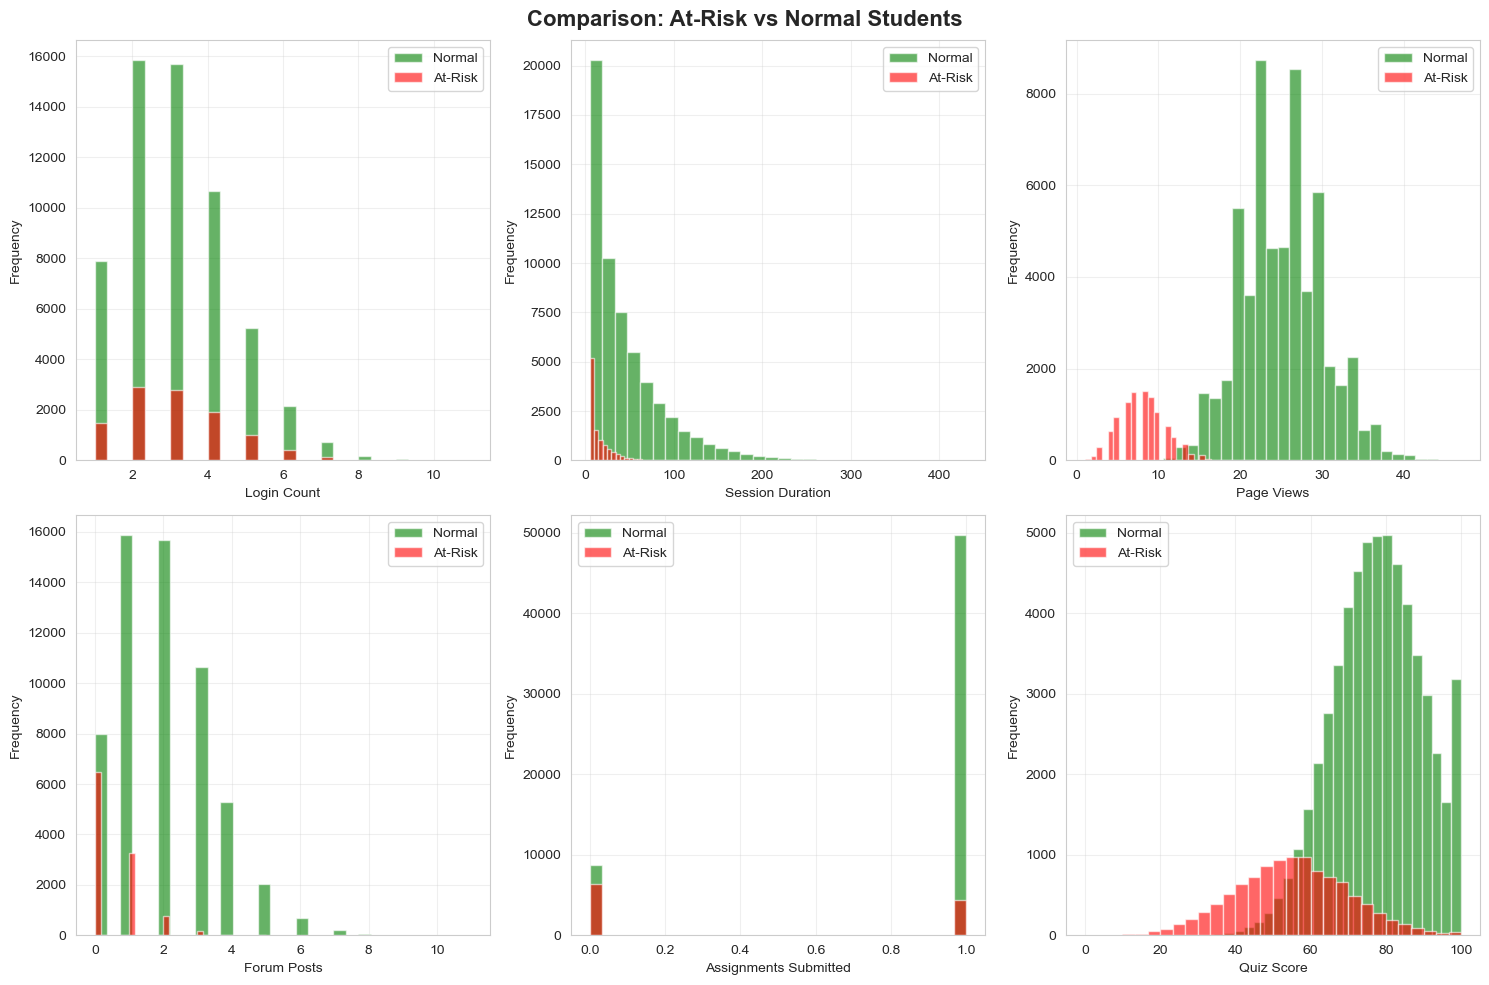


Average Metrics by Student Type
         login_count  session_duration  page_views  forum_posts  \
Normal      3.002207         45.438898   24.995106     1.993035   
At-Risk     2.999064         15.763099    8.000936     0.497940   

         assignments_submitted  quiz_score  
Normal                0.850648   77.791288  
At-Risk               0.405261   55.029778  


In [5]:
# Compare at-risk vs normal students
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

metrics = ['login_count', 'session_duration', 'page_views', 
           'forum_posts', 'assignments_submitted', 'quiz_score']

for idx, metric in enumerate(metrics):
    ax = axes[idx // 3, idx % 3]
    
    # Separate data by risk level
    at_risk_data = raw_data[raw_data['at_risk'] == 1][metric]
    normal_data = raw_data[raw_data['at_risk'] == 0][metric]
    
    # Plot histograms
    ax.hist(normal_data, bins=30, alpha=0.6, label='Normal', color='green')
    ax.hist(at_risk_data, bins=30, alpha=0.6, label='At-Risk', color='red')
    
    ax.set_xlabel(metric.replace('_', ' ').title())
    ax.set_ylabel('Frequency')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.suptitle('Comparison: At-Risk vs Normal Students', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*60)
print("Average Metrics by Student Type")
print("="*60)
comparison = raw_data.groupby('at_risk')[metrics].mean()
comparison.index = ['Normal', 'At-Risk']
print(comparison)

## Step 4: Time-Based Engagement Trends

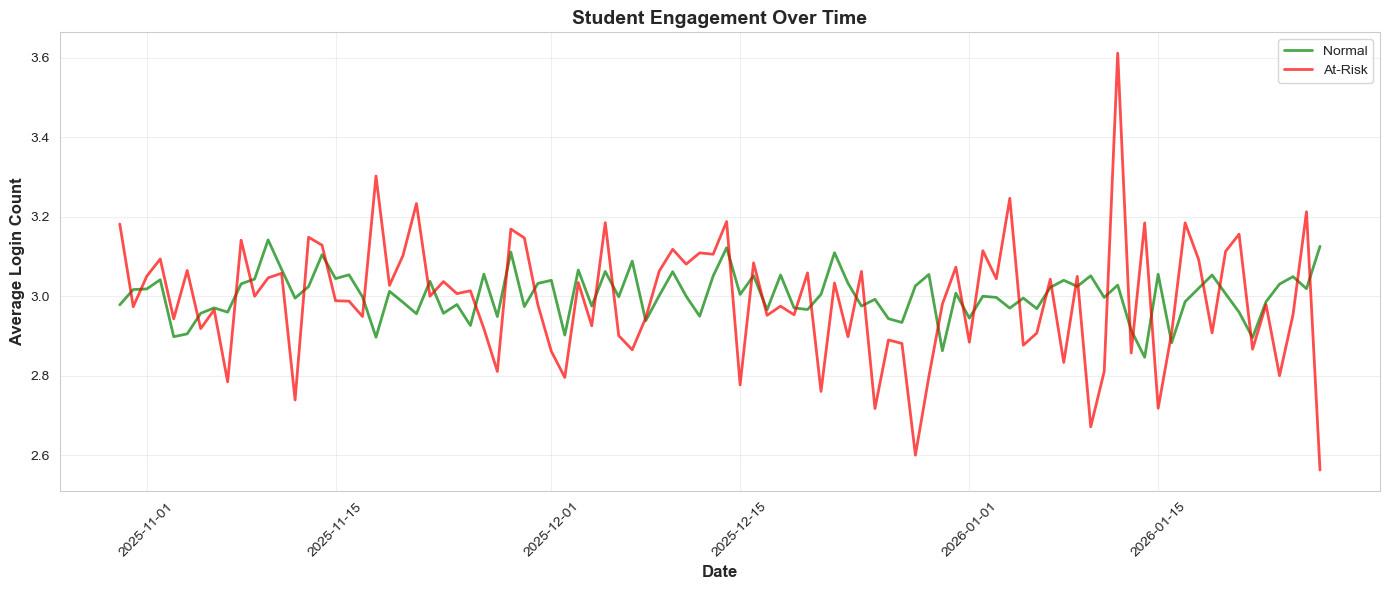

Observation: At-risk students show declining engagement over time.


In [6]:
# Convert date to datetime
raw_data['date'] = pd.to_datetime(raw_data['date'])

# Group by date and risk level
daily_engagement = raw_data.groupby(['date', 'at_risk'])['login_count'].mean().reset_index()

# Plot
plt.figure(figsize=(14, 6))
for risk_level in [0, 1]:
    data = daily_engagement[daily_engagement['at_risk'] == risk_level]
    label = 'At-Risk' if risk_level == 1 else 'Normal'
    color = 'red' if risk_level == 1 else 'green'
    plt.plot(data['date'], data['login_count'], label=label, color=color, alpha=0.7, linewidth=2)

plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Average Login Count', fontsize=12, fontweight='bold')
plt.title('Student Engagement Over Time', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Observation: At-risk students show declining engagement over time.")

## Step 5: Save Data for Next Steps

In [7]:
# Save the raw data
filepath = generator.save_data(raw_data, filename='lms_logs_1000_students_90_days.csv')

print(f"\n✓ Data saved successfully!")
print(f"File location: {filepath}")
print(f"\nNext step: Run notebook 02_feature_engineering.ipynb")

Data saved to: C:\Users\aimje\OneDrive\Documents\Other projects\early_detection_lms\data\synthetic\lms_logs_1000_students_90_days.csv

✓ Data saved successfully!
File location: C:\Users\aimje\OneDrive\Documents\Other projects\early_detection_lms\data\synthetic\lms_logs_1000_students_90_days.csv

Next step: Run notebook 02_feature_engineering.ipynb
